## Eurosat Classification Model
- Paul Ritter
- Connor Hite
- Matt Gish

### Installation of Tensorflow datasets and matplotlib

In [1]:
!pip install -q tfds-nightly tensorflow matplotlib

### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import keras as keras
from tensorflow.keras import datasets, layers, models 
import tensorflow as tf
from tensorflow import keras

import IPython
!pip install -q -U keras-tuner
import kerastuner as kt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  if sys.path[0] == '':


### Loading the dataset and resizing the train test split

We trained the model on the EuroSAT database, which is a deep learning benchmark dataset for land cover classification all accross europe. They have many well selected and distinguished examples of crop formations, various buildings, and inland bodies of water. The downfall of this dataset is the lack of time series data. This is why we formatted our model around training on this data, while testing on our own similarly formatted dataset.

In [3]:
image, label = tfds.as_numpy(tfds.load(
    'eurosat',
    split='train', 
    batch_size=-1, 
    as_supervised=True,
    shuffle_files=True
))

images_train, labels_train = [image[:21600], label[:21600]]

images_test, labels_test = [image[21600:], label[21600:]]

images_val, labels_val = [images_test[:1000], labels_test[:1000]]###############################################Break off 1000 from testing set for validation

images_train, images_test = images_train / 255.0, images_test / 255.0


## Plot first 15 Images from Eurosat

With our training complete, lets output some of these example photos from the Eurosat dataset along with the class labels within our training data. These only make up about half of the classifications that our model will be capable of differentiating.

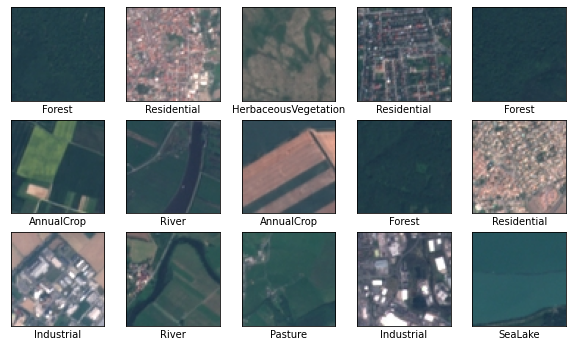

In [4]:
class_names = ['AnnualCrop','Forest', 'HerbaceousVegetation', 'Highway', 
'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake' ]

plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[labels_train[i]])
plt.show()

### Define Original CNN Model

Now that we have demonstrated the range of classifications that our model is familiar with, it is time to build out our architecture for our model. This architecture is modeled after a tried and tested infrastructure for Convolution Neural Networks applied to image classification. Our general architecture consists of 4 layers of 2D layers, Global average pooling, a dense layer, a dropout layer to remove outliers, and a final denslayer with a softmax activation function.

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(8, 3, activation='relu', input_shape=(64, 64, 3))),
model.add(layers.MaxPooling2D()),
model.add(layers.Conv2D(16, 3, activation='relu' )),
model.add(layers.MaxPooling2D()),
model.add(layers.Conv2D(32, 3, activation='relu')),
model.add(layers.MaxPooling2D()),
model.add(layers.Conv2D(64, 3, activation='relu')),
model.add(layers.MaxPooling2D()),
model.add(layers.Dense(128, activation='relu')),
model.add(layers.GlobalAveragePooling2D()),
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dropout(rate= 0.2)),
model.add(layers.Dense(10, activation='softmax') )

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

### Model Compilation 

We chose and Adam optimizer with a learning rate of 0.001. We compiled the model using these parameters and prepared to fit.

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Model Fit and Evaluation

Finally, we can fit the model to the dataset to train our advanced architecture to the selected Eurosat images. This will equip our model with the ability to make classifications on all images of similar structure within a margin of accuracy.

In [8]:
history = model.fit(images_train,
                    labels_train,
                    epochs=30,
                    validation_data=(images_test, labels_test))


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


675/675 [==============================] - 9s 11ms/step - loss: 1.5053 - accuracy: 0.4066 - val_loss: 1.1806 - val_accuracy: 0.5646
Epoch 2/30
675/675 [==============================] - 7s 10ms/step - loss: 1.0467 - accuracy: 0.6149 - val_loss: 0.8428 - val_accuracy: 0.6956
Epoch 3/30
675/675 [==============================] - 7s 10ms/step - loss: 0.8859 - accuracy: 0.6709 - val_loss: 0.7304 - val_accuracy: 0.7296
Epoch 4/30
675/675 [==============================] - 6s 10ms/step - loss: 0.8168 - accuracy: 0.6967 - val_loss: 0.6995 - val_accuracy: 0.7415
Epoch 5/30
675/675 [==============================] - 7s 11ms/step - loss: 0.7600 - accuracy: 0.7205 - val_loss: 0.7103 - val_accuracy: 0.7343
Epoch 6/30
675/675 [==============================] - 7s 10ms/step - loss: 0.7326 - accuracy: 0.7325 - val_loss: 0.6508 - val_accuracy: 0.7604
Epoch 7/30
675/675 [==============================] - 7s 10ms/step - loss: 0.6819 - accuracy: 0.7531 - val_loss: 0.6387 - val_accuracy: 0.7552
Epoch 8/30

Now that our model is trained, we can plot the accuracy of the validation data to ensure successful training. The loss function has a logarithmic shape to it, which is indicative of a successful training phase. We can use this as a known good model to evaluate change in given circumstances.

169/169 - 1s - loss: 0.3681 - accuracy: 0.8733 - 779ms/epoch - 5ms/step
0.8733333349227905


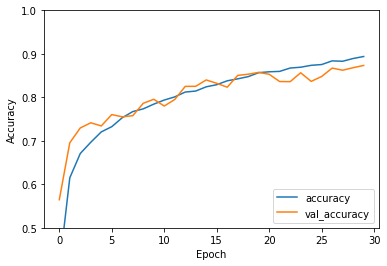

In [9]:
plt.plot(history.history['accuracy'], label='accuracy') 
plt.plot(history.history['val_accuracy'], 
         label = 'val_accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1]) 
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(images_test, labels_test, verbose=2) 
print(test_acc)

###Change Detection
This section will depict a selected portion of our testing data that exhibits notable change to prove the concept of change detection. The given images will display a small development in Malaysia, where an area of primarily roads and forest were replaced with industrial complexes through a span of just 4 years.

In [10]:
import cv2
import pandas as pd

In [11]:
pic = cv2.imread("beforeInd.tif")
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pic = pic / 255.0

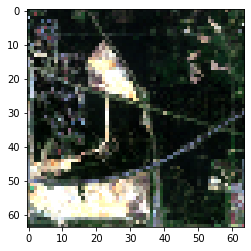

In [12]:
plt.imshow(pic)

In [13]:
pic.shape

(64, 64, 3)

In [14]:
predictions = model.predict(pic.reshape(-1,64,64,3))


In [15]:
percents = []

for j in predictions[0]:
  percents.append( format(j * 100,"0.4f") )  

In [16]:
import pandas as pd

In [17]:
classifications = {
    'AnnualCrop': percents[0],
    'Forest' : percents[1],
    'HerbaceousVegetation' : percents[2],
    'Highway' : percents[3],
    'Industrial' : percents[4],
    'Pasture' : percents[5],
    'PermanentCrop' : percents[6],
    'Residential' : percents[7],
    'River' : percents[8],
    'SeaLake' : percents[9]
}

In [18]:
df = pd.DataFrame(classifications,index=[0], columns= ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway',
                                             'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'])

In [19]:
df

,AnnualCrop,Forest,HerbaceousVegetation,Highway,Industrial,Pasture,PermanentCrop,Residential,River,SeaLake
0,0.0000,0.0000,41.5214,14.6502,41.9985,0.0000,1.7816,0.0478,0.0004,0.0000


### Updated Imagery of Malaysian Location

In [20]:
import cv2
import pandas as pd

In [21]:
pic2 = cv2.imread("afterInd.tif")
pic2 = cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB)
pic2 = pic2 / 255.0

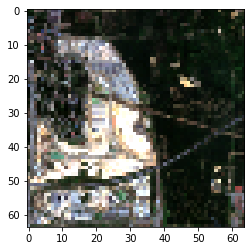

In [22]:
plt.imshow(pic2)

In [23]:
pic2.shape

(64, 64, 3)

In [24]:
predictions2 = model.predict(pic2.reshape(-1,64,64,3))

In [25]:
percents2 = []

for j in predictions2[0]:
  percents2.append( format(j * 100,"0.4f") )  

In [26]:
import pandas as pd

In [27]:
classifications2 = {
    'AnnualCrop': percents2[0],
    'Forest' : percents2[1],
    'HerbaceousVegetation' : percents2[2],
    'Highway' : percents2[3],
    'Industrial' : percents2[4],
    'Pasture' : percents2[5],
    'PermanentCrop' : percents2[6],
    'Residential' : percents2[7],
    'River' : percents2[8],
    'SeaLake' : percents2[9]
}

In [28]:
df2 = pd.DataFrame(classifications2,index=[0], columns= ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway',
                                             'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'])

In [29]:
df2

,AnnualCrop,Forest,HerbaceousVegetation,Highway,Industrial,Pasture,PermanentCrop,Residential,River,SeaLake
0,0.0000,0.0000,0.3400,1.3446,98.3103,0.0000,0.0015,0.0035,0.0000,0.0000


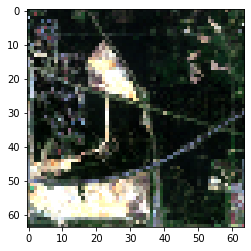

In [30]:
plt.imshow(pic)

In [31]:
df

,AnnualCrop,Forest,HerbaceousVegetation,Highway,Industrial,Pasture,PermanentCrop,Residential,River,SeaLake
0,0.0000,0.0000,41.5214,14.6502,41.9985,0.0000,1.7816,0.0478,0.0004,0.0000


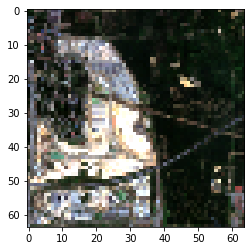

In [32]:
plt.imshow(pic2)

In [33]:
df2

,AnnualCrop,Forest,HerbaceousVegetation,Highway,Industrial,Pasture,PermanentCrop,Residential,River,SeaLake
0,0.0000,0.0000,0.3400,1.3446,98.3103,0.0000,0.0015,0.0035,0.0000,0.0000


# END HERE


##This next sections shows hypertuning with keras tuner that we messed with after finishing the project

# HYPERTUNING TO GET BETTER ACCURACY


In [34]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [35]:
def build_model(hp):
  model = models.Sequential()
  model.add(layers.Conv2D(64, activation='relu', kernel_size=3, input_shape=(64, 64, 3))),
  model.add(layers.MaxPooling2D()),
  model.add(layers.Conv2D(224, 3, activation='relu' )),
  model.add(layers.MaxPooling2D()),
  model.add(layers.Conv2D(64, 3, activation='relu')),
  model.add(layers.MaxPooling2D()),
  model.add(layers.Conv2D(32, 3, activation='relu')),
  model.add(layers.MaxPooling2D()),
  #model.add(layers.MaxPooling2D()),
  model.add(layers.GlobalAveragePooling2D()),
  #model.add(layers.Flatten()), #GlobalAveragePooling2D----------
  model.add(layers.Dense(192, activation='relu')),
  model.add(layers.Dropout(rate= 0.2)),
  model.add(layers.Dense(10))
  #hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4, 1e-5]) 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model


In [36]:
tuner= RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=50,
    executions_per_trial=2,
    directory = 'presentation4'
    )

INFO:tensorflow:Reloading Oracle from existing project presentation4/untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project presentation4/untitled_project/oracle.json


In [ ]:
tuner.search(x=images_train,
             y=labels_train,
             epochs=30,
             validation_data=(images_test, labels_test))

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
tuner.search(images_train, labels_train, epochs = 30, validation_data = (images_test, labels_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 5)[0]

#print(f"""
#The hyperparameter search is complete. The optimal number of units in the first densely-connected
#layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
#is {best_hps.get('learning_rate')}.
#""")
tuner.results_summary()

End of Presentation 

In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
def build_model(hp):
  model = models.Sequential()
  model.add(layers.Conv2D(hp.Int('units', 32,256,32), activation='relu', kernel_size=3, input_shape=(64, 64, 3))),
  model.add(layers.MaxPooling2D()),
  model.add(layers.Conv2D(16, 3, activation='relu' )),
  model.add(layers.MaxPooling2D()),
  model.add(layers.Conv2D(32, 3, activation='relu')),
  model.add(layers.MaxPooling2D()),
  model.add(layers.Conv2D(64, 3, activation='relu')),
  model.add(layers.MaxPooling2D()),
  #model.add(layers.MaxPooling2D()),
  model.add(layers.GlobalAveragePooling2D()),
  #model.add(layers.Flatten()), #GlobalAveragePooling2D----------
  model.add(layers.Dense(128, activation='relu')),
  model.add(layers.Dropout(rate= 0.2)),
  model.add(layers.Dense(10))
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model

In [ ]:
tuner= RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=1,
    executions_per_trial=3,
    directory = 'my_dir'
    )

In [ ]:
tuner.search(x=images_train,
             y=labels_train,
             epochs=10,
             validation_data=(images_test, labels_test))

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
tuner.search(images_train, labels_train, epochs = 10, validation_data = (images_test, labels_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

#print(f"""
#The hyperparameter search is complete. The optimal number of units in the first densely-connected
#layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
#is {best_hps.get('learning_rate')}.
#""")
tuner.results_summary()